# Configuración Inicial

La configuración consiste en un conjunto de partículas representado por círculos de mismo radio generados y centros de colocados de manera aleatoria. Estas partículas cumplen con la condición de no traslape, es decir, la distancia entre el centro de dos particulas no puede ser menor o igual al radio y esto debe cumplirse para cualquier par de partículas. 

Para poder generar los numeros necesarios y una visualización de configuración obtenida se utilizaran las librerias `numpy` y `matplotlib.pyplot`.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

Las variables requeridas para realizar la configuración son das dimensiones de la caja `L`, el radio de las particulas `R` y el número de partículas.

In [32]:
L = 20 
R = L/40 
numero_de_particulas = 128 

La configuración incicial es generada de la siguiente manera:

In [22]:
particulas= [] # objetos tipo particle
coordenadas = [] # coordenada de los objetos elegidos


class particle(): # clase particle
    
    def __init__(self):
        
        self.x = np.random.uniform(R,L-R)
        self.y = np.random.uniform(R,L-R)

        
### CONFIGURACION INICIAL DE PARTICULAS

while len(particulas) < numero_de_particulas:
    
    superposicion = False
    particula_propuesta = particle()
    
  
    for particula_existentes in particulas:
        distancia = np.sqrt((particula_propuesta.x-particula_existentes.x)**2
                            +(particula_propuesta.y-particula_existentes.y)**2)
            
        if (distancia < 2*R) and (particula_propuesta != particula_existentes):
            superposicion = True
            break
        
    if not superposicion:
        particulas.append(particula_propuesta)   
        coordenadas.append([particula_propuesta.x,particula_propuesta.y])

Seguido a crear la configuración inicial procedemos a guardarla en un archivo de texto.

In [ ]:
myList = ["{0} {1}\n".format(x1, x2) for (x1, x2) in coordenadas]
with open('config_inicial.txt', 'w') as out_file:
    out_file.writelines(myList)

Por ultimo, se gráfica la configuración obtenida

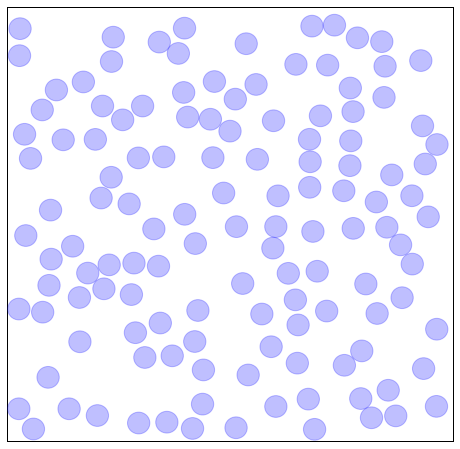

In [33]:
fig = plt.figure(figsize=(8,8)) # tamaño de la imagen 

box = plt.Rectangle((0,0),L,L,fill=False,lw=2)#Dibujo de la cajas
plt.gca().add_patch(box)  
           
for coordenada in coordenadas: 
    
    p = plt.Circle((coordenada[0],coordenada[1]),R,alpha=0.25
    ,color='b')      
    plt.gca().add_patch(p)         


plt.xlim( 0,  L)
plt.ylim(0,  L) 

plt.axis('off')
plt.savefig('config_incial.png')
plt.show()